([<matplotlib.lines.Line2D at 0x1fbf3ef1cc8>,
  <matplotlib.patches.Rectangle at 0x1fbf424fc88>])

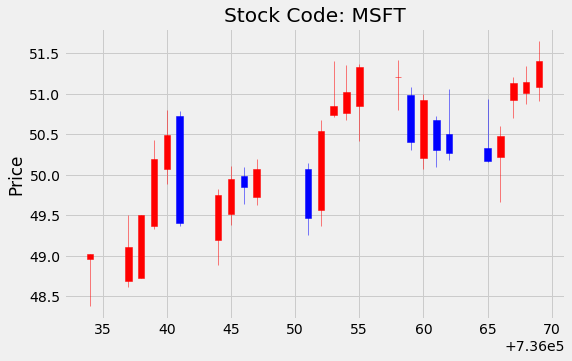

In [18]:
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas_datareader as web
from mpl_finance import candlestick_ohlc

# import packages
import matplotlib.animation as animation
from matplotlib import rcParams

from collections import deque
import pandas as pd
import numpy as np
import random


fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

data = pd.read_csv('../raw_data/{}.csv'.format('MSFT'))    
num = len(data)

# #get indicators
# bolingerband(data)
# dmi(data)
# macd(data)
# rsi(data)

date_deque = deque(maxlen=25)
open_deque = deque(maxlen=25)
high_deque = deque(maxlen=25)
low_deque = deque(maxlen=25)
close_deque = deque(maxlen=25)
volumn_deque = deque(maxlen=25)
signal_deque = deque(maxlen=25)

dates = data['Date'].values
closes = data['Close'].values
opens = data['Open'].values
highes = data['High'].values
lows = data['Low'].values
volumns = data['Volume'].values

for i in dates:
    date_deque.append(i)
for i in closes:
    close_deque.append(i)
for i in opens:
    open_deque.append(i)
for i in highes:
    high_deque.append(i)
for i in lows:
    low_deque.append(i)
for i in volumns:
    volumn_deque.append(i)
for i in lows:
    signal_deque.append(i)

deque_df = pd.DataFrame(list(zip(date_deque,open_deque, high_deque, low_deque, close_deque, close_deque)),\
                        columns =['Date', 'Open', 'High', 'Low', 'Close', 'Volumn']) 
deque_df = deque_df.set_index('Date')
deque_df.index = pd.to_datetime(deque_df.index)

deque_df['Buy'] = deque_df['Low'].apply(lambda x : random.randint(0, 2))
value = 50000

plt.cla()
plt.ylabel('Price')
plt.title('Stock Code: {}'.format('MSFT'))

#plot Close
candlestick_ohlc(ax,zip(mdates.date2num(deque_df.index.to_pydatetime()),\
                        deque_df['Open'],deque_df['High'],deque_df['Low'],deque_df['Close'])\
                 ,width=0.5,colorup="r",colordown="b")